In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Assuming 'scaler' and 'model' have already been defined and trained

# Create a new input DataFrame
new_input_data = {
    'Crop': ['maize'],         # Example crop
    'Crop_Year': [2021],      # Example year
    'Season': ['Rabi'],       # Example season
    'State': ['assam'],      # Example state
    'Area': [100],            # Example area
    'Production': [500],      # Example production
    'Annual_Rainfall': [200], # Example rainfall
    'Fertilizer': [50],       # Example fertilizer usage
    'Pesticide': [10]         # Example pesticide usage
}

# Convert to DataFrame
new_input_df = pd.DataFrame(new_input_data)

# One-hot encode the categorical columns
new_input_df = pd.get_dummies(new_input_df, columns=['Crop', 'Season', 'State'])

# Ensure all columns match the training set
# If the training set had more categories, this will fill them with zeros
for column in X.columns:
    if column not in new_input_df.columns:
        new_input_df[column] = 0
new_input_df = new_input_df[X.columns]  # Reorder columns to match training data

# Standardize the new input features
new_input_scaled = scaler.transform(new_input_df)

# Predict the yield using the trained model
predicted_yield = model.predict(new_input_scaled)

# Output the prediction
print(f'Predicted Yield: {predicted_yield[0][0]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted Yield: 1521.9566650390625


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

# Load your dataset
data = pd.read_csv('/content/crop_yield.csv')  # Adjust the filename as needed

# Preprocessing
# Convert categorical columns to numeric if necessary (e.g., one-hot encoding)
data = pd.get_dummies(data, columns=['Crop', 'Season', 'State'])

# Define features and target variable
X = data.drop(columns=['Yield'])
y = data['Yield']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

# Predicting crop yield
predictions = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
394/394 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 997829.8125 - val_loss: 644765.5625
Epoch 2/100
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 328760.5000 - val_loss: 148196.4688
Epoch 3/100
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 115109.2734 - val_loss: 110893.8828
Epoch 4/100
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 95392.3672 - val_loss: 92638.9141
Epoch 5/100
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 69068.8828 - val_loss: 79664.4297
Epoch 6/100
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 70930.2031 - val_loss: 69134.3281
Epoch 7/100
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 72478.0156 - val_loss: 61405.5625
Epoch 8/100
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 49036.8047 - val_loss: 54964.8555
Epoch 9/100
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 64240.5117 - val_loss: 49715.5703
Epoch 10/100
394/394 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 53920.8320 - val_loss: 44976.9375
Epoch 11/100
394/394 ━━━━━━━━━━━━━━━━━━━━ 2

Accuracy (R-squared): 0.9851210869379775


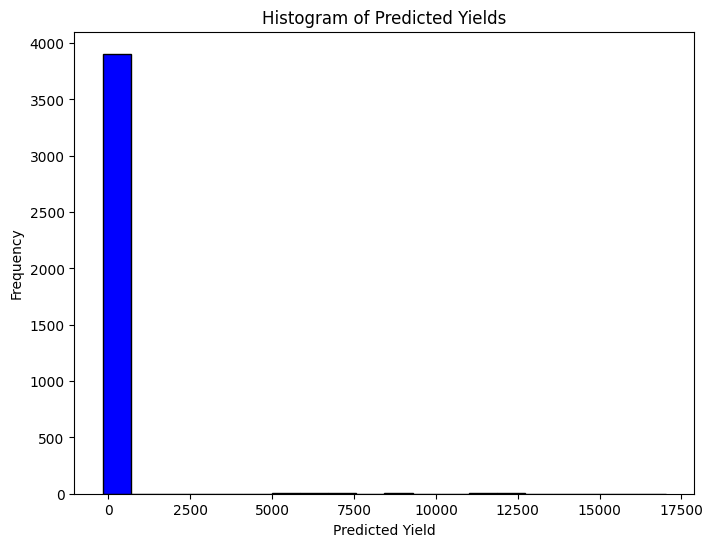

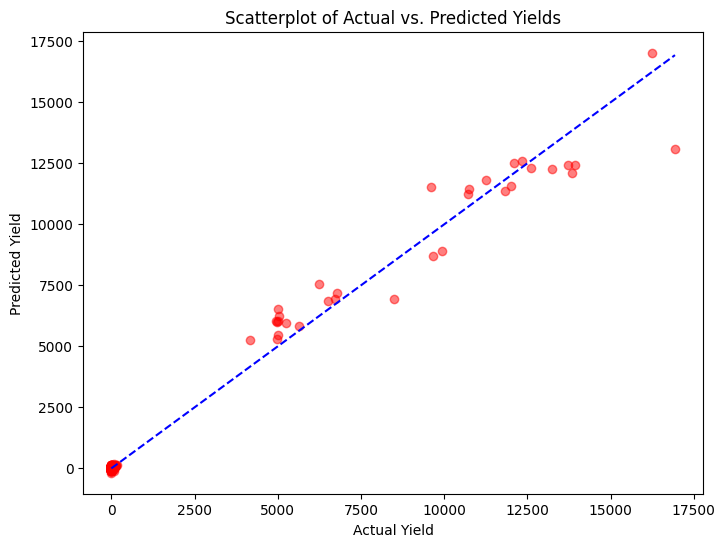

In [ ]:

import matplotlib.pyplot as plt
import numpy as np

# Assuming you have predictions and y_test from your code

# Calculate accuracy (you'll need to define what accuracy means for regression)
# For example, you could calculate the R-squared value or the mean absolute error
# Here, we'll use R-squared as an example
from sklearn.metrics import r2_score

accuracy = r2_score(y_test, predictions)
print(f"Accuracy (R-squared): {accuracy}")


# Create a histogram of predicted yields
plt.figure(figsize=(8, 6))
plt.hist(predictions, bins=20, color='blue', edgecolor='black')
plt.xlabel('Predicted Yield')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Yields')
plt.show()


# Create a scatterplot of predicted vs. actual yields
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, color='red', alpha=0.5)
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('Scatterplot of Actual vs. Predicted Yields')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='blue')  # Add a diagonal line for reference
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Id                   1958 non-null   int64 
 1   Age                  1958 non-null   int64 
 2   Gender               1958 non-null   object
 3   Hormonal Changes     1958 non-null   object
 4   Family History       1958 non-null   object
 5   Race/Ethnicity       1958 non-null   object
 6   Body Weight          1958 non-null   object
 7   Calcium Intake       1958 non-null   object
 8   Vitamin D Intake     1958 non-null   object
 9   Physical Activity    1958 non-null   object
 10  Smoking              1958 non-null   object
 11  Alcohol Consumption  970 non-null    object
 12  Medical Conditions   1311 non-null   object
 13  Medications          973 non-null    object
 14  Prior Fractures      1958 non-null   object
 15  Osteoporosis         1958 non-null   int64 
dtypes: int

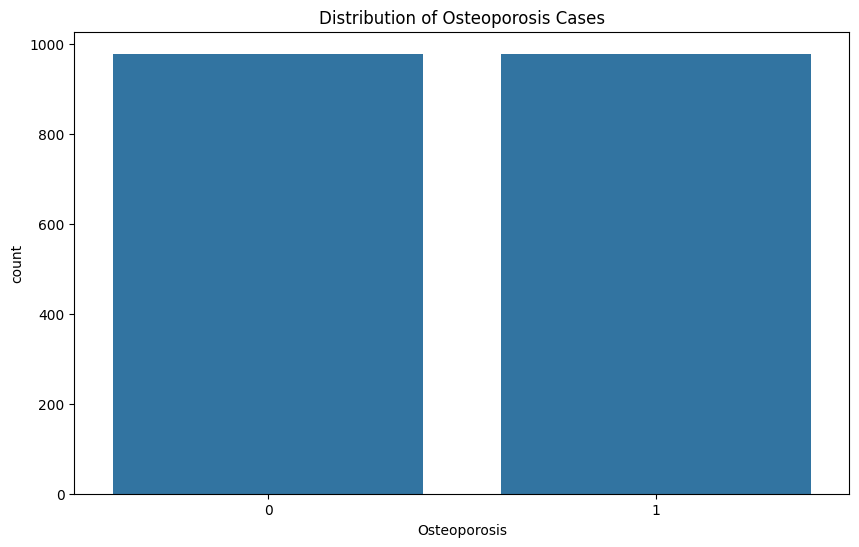

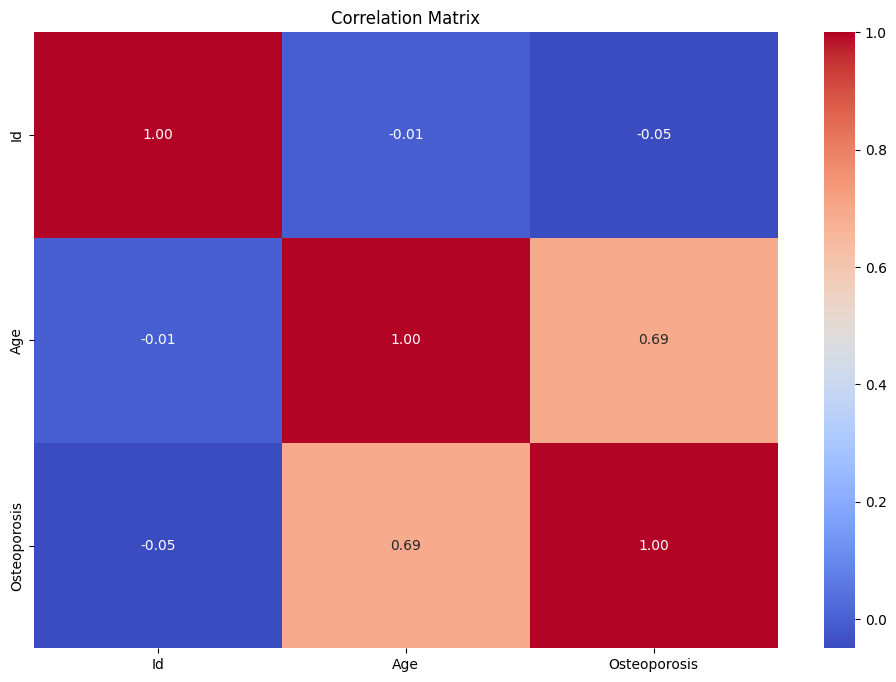

Please enter the following details:


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import joblib

# Load the dataset
data = pd.read_csv('/content/osteoporosis.csv')
# Display basic information
print(data.info())
print(data.describe())


# Visualizations
plt.figure(figsize=(10, 6))
sns.countplot(x='Osteoporosis', data=data)
plt.title('Distribution of Osteoporosis Cases')
plt.show()

# Correlation matrix - Select only numeric columns
plt.figure(figsize=(12, 8))
numeric_data = data.select_dtypes(include=np.number)  # Select numeric columns
sns.heatmap(numeric_data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Handle missing values
imputer = SimpleImputer(strategy='most_frequent')
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Convert categorical columns to numerical using one-hot encoding
categorical_cols = ['Gender', 'Hormonal Changes', 'Family History', 'Race/Ethnicity',
                    'Body Weight', 'Calcium Intake', 'Vitamin D Intake',
                    'Physical Activity', 'Smoking', 'Alcohol Consumption',
                    'Medical Conditions', 'Medications', 'Prior Fractures']

data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Prepare data for modeling
X = data.drop(['Id', 'Osteoporosis'], axis=1)  # Drop non-feature columns
y = data['Osteoporosis']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Data reduction (optional)
pca = PCA(n_components=0.95)  # Adjust based on variance explained
X_reduced = pca.fit_transform(X_scaled)



# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Convert y_train and y_test to numeric type (int or float) before training and evaluating the model
# This line addresses the error by converting the target variable to a standard numeric type
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Save the model and preprocessing objects
joblib.dump(model, 'osteoporosis_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(imputer, 'imputer.pkl')
joblib.dump(pca, 'pca.pkl')

# Function to predict osteoporosis risk based on user input
def predict_osteoporosis():
    print("Please enter the following details:")

    # Collecting user input
    age = int(input("Age: "))
    gender = input("Gender (Male/Female): ")
    hormonal_changes = input("Hormonal Changes (Yes/No): ")
    family_history = input("Family History (Yes/No): ")
    race = input("Race/Ethnicity: ")
    body_weight = input("Body Weight: ")
    calcium_intake = input("Calcium Intake: ")
    vitamin_d_intake = input("Vitamin D Intake: ")
    physical_activity = input("Physical Activity (Yes/No): ")
    smoking = input("Smoking (Yes/No): ")
    alcohol_consumption = input("Alcohol Consumption (Yes/No): ")
    medical_conditions = input("Medical Conditions (Comma separated): ")
    medications = input("Medications (Comma separated): ")
    prior_fractures = input("Prior Fractures (Yes/No): ")

    # Creating a DataFrame for the new input
    # Include 'Id' and 'Osteoporosis' with dummy values
    new_data = pd.DataFrame({
        'Id': [0],  # Dummy value for 'Id'
        'Age': [age],
        'Gender': [gender],
        'Hormonal Changes': [hormonal_changes],
        'Family History': [family_history],
        'Race/Ethnicity': [race],
        'Body Weight': [body_weight],
        'Calcium Intake': [calcium_intake],
        'Vitamin D Intake': [vitamin_d_intake],
        'Physical Activity': [physical_activity],
        'Smoking': [smoking],
        'Alcohol Consumption': [alcohol_consumption],
        'Medical Conditions': [medical_conditions],
        'Medications': [medications],
        'Prior Fractures': [prior_fractures],
        'Osteoporosis': [0]  # Dummy value for 'Osteoporosis'
    })

    # Preprocess the input data
    new_data_imputed = imputer.transform(new_data)
    # Convert back to DataFrame to ensure columns are preserved
    new_data_imputed = pd.DataFrame(new_data_imputed, columns=new_data.columns)
    new_data_encoded = pd.get_dummies(new_data_imputed, columns=categorical_cols, drop_first=True)

    # Align columns to match the training data
    new_data_encoded = new_data_encoded.reindex(columns=X.columns, fill_value=0)

    # ... (rest of your code remains the same) ...
    # Scale and reduce dimensions
    new_data_scaled = scaler.transform(new_data_encoded)
    new_data_reduced = pca.transform(new_data_scaled)

    # Make a prediction
    prediction = model.predict(new_data_reduced)

    if prediction[0] == 1:
        print("The model predicts: High risk of osteoporosis.")
    else:
        print("The model predicts: Low risk of osteoporosis.")

# Call the function
predict_osteoporosis()


In [ ]:
User car evaluation Data Set from UCI repostory. Predict the safety of the car. Use following algorithm random forest svm


SyntaxError: invalid syntax (<ipython-input-7-67707d77b244>, line 1)

In [ ]:
# Predict the safety of the car using Random Forest and SVM algorithms.
# Dataset: Car Evaluation Data Set from UCI repository.

# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# 1. Load the dataset
# Replace 'car_evaluation.csv' with the actual file path if necessary
data = pd.read_csv('car_evaluation.csv')

# 2. Preprocess the data (if needed)
# Assuming your dataset has columns like 'buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', and 'class'
# where 'class' is the target variable (acceptability)
X = data.drop('class', axis=1)
y = data['class']

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X)

# 3. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Train the models
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# SVM
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# 5. Make predictions
rf_predictions = rf_model.predict(X_test)
svm_predictions = svm_model.predict(X_test)

# 6. Evaluate the models
rf_accuracy = accuracy_score(y_test, rf_predictions)
svm_accuracy = accuracy_score(y_test, svm_predictions)

print("Random Forest Accuracy:", rf_accuracy)
print("SVM Accuracy:", svm_accuracy)

# You can further analyze the results using other evaluation metrics (precision, recall, F1-score, etc.)
# and compare the performance of the two models.


KeyError: "['class'] not found in axis"

In [ ]:
# Predict the safety of the car using Random Forest and SVM algorithms.
# Dataset: Car Evaluation Data Set from UCI repository.

# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# 1. Load the dataset
# Replace 'car_evaluation.csv' with the actual file path if necessary
data = pd.read_csv('/content/car_evaluation.csv')

# Check the column names to ensure the correct ones are used
print(data.columns)

# 2. Preprocess the data (if needed)
# Assuming your dataset has columns like 'buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', and 'acceptability'
# where 'acceptability' is the target variable (acceptability)
X = data.drop('acceptability', axis=1)
y = data['acceptability']

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X)

# 3. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Train the models
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# SVM
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# 5. Make predictions
rf_predictions = rf_model.predict(X_test)
svm_predictions = svm_model.predict(X_test)

# 6. Evaluate the models
rf_accuracy = accuracy_score(y_test, rf_predictions)
svm_accuracy = accuracy_score(y_test, svm_predictions)

print("Random Forest Accuracy:", rf_accuracy)
print("SVM Accuracy:", svm_accuracy)

# You can further analyze the results using other evaluation metrics (precision, recall, F1-score, etc.)
# and compare the performance of the two models.


Index(['vhigh', 'vhigh.1', '2', '2.1', 'small', 'low', 'unacc'], dtype='object')


KeyError: "['acceptability'] not found in axis"

In [ ]:
# Predict the safety of the car using Random Forest and SVM algorithms.
# Dataset: Car Evaluation Data Set from UCI repository.

# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# 1. Load the dataset
# Replace 'car_evaluation.csv' with the actual file path if necessary
data = pd.read_csv('/content/car_evaluation.csv')

# Check the column names
print(data.columns)

# 2. Preprocess the data
# 'unacc' seems to be the target column, based on your dataset structure
X = data.drop('unacc', axis=1)
y = data['unacc']

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X)

# 3. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Train the models
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# SVM
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# 5. Make predictions
rf_predictions = rf_model.predict(X_test)
svm_predictions = svm_model.predict(X_test)

# 6. Evaluate the models
rf_accuracy = accuracy_score(y_test, rf_predictions)
svm_accuracy = accuracy_score(y_test, svm_predictions)

print("Random Forest Accuracy:", rf_accuracy)
print("SVM Accuracy:", svm_accuracy)

# You can further analyze the results using other evaluation metrics (precision, recall, F1-score, etc.)


Index(['vhigh', 'vhigh.1', '2', '2.1', 'small', 'low', 'unacc'], dtype='object')
Random Forest Accuracy: 0.953757225433526
SVM Accuracy: 0.9248554913294798
